In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import Functions as fs

# Read in the Data 

In [2]:
game_data = pd.read_csv("Sample_Game_2_RawEventsData.csv")

In [3]:
game_data

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [4]:
game_data["Type"].value_counts()

Type
PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: count, dtype: int64

Convert the positions from 0-1 to meters. 
Keep the teams attacking at the same end, so invert the second half coordinates accordingly.

In [5]:
game_data= fs.transform_positions(game_data)
shots = game_data[game_data["Type"]=="SHOT"]

In [6]:
shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,13.65,15.64,-2.10,31.28
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,5.25,37.40,-1.05,36.04
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,11.55,22.44,4.20,33.32
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,84.00,23.80,90.30,22.44
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,9.45,40.12,-1.05,40.12
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,21.00,47.60,0.00,36.72
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,96.60,31.28,106.05,32.64
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,10.50,27.88,-2.10,51.68
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,97.65,33.32,106.05,40.80
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,80.85,37.40,103.95,36.04


# Read in the Tracking Data 

This data is used to add richness to the machine learning model, the extra value provided by interfernce on shot or players in the line of sight of the goal adds a few percent of predictive power.

In [7]:
home = pd.read_csv("Sample_Game_2_RawTrackingData_Home_Team.csv")

C:\Users\23510\AppData\Local\Temp\ipykernel_10836\1468604209.py:1: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  home = pd.read_csv("Sample_Game_2_RawTrackingData_Home_Team.csv")


In [8]:
away = pd.read_csv("Sample_Game_2_RawTrackingData_Away_Team.csv")

C:\Users\23510\AppData\Local\Temp\ipykernel_10836\2239715355.py:1: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  away = pd.read_csv("Sample_Game_2_RawTrackingData_Away_Team.csv")


In [9]:
home

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Home,Unnamed: 4,Home.1,Unnamed: 6,Home.2,Unnamed: 8,Home.3,...,Home.10,Unnamed: 24,Home.11,Unnamed: 26,Home.12,Unnamed: 28,Home.13,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,11,NaN,1,NaN,2,NaN,3,...,10,NaN,12,NaN,13,NaN,14,NaN,NaN,NaN
1,Period,Frame,Time [s],Player11,NaN,Player1,NaN,Player2,NaN,Player3,...,Player10,NaN,Player12,NaN,Player13,NaN,Player14,NaN,Ball,NaN
2,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141153,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141154,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141155,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN
141156,2,141155,5646.2,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51028,0.94792,0.28059,0.36706,NaN,NaN


In [10]:
away

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Away,Unnamed: 4,Away.1,Unnamed: 6,Away.2,Unnamed: 8,Away.3,...,Away.8,Unnamed: 20,Away.9,Unnamed: 22,Away.10,Unnamed: 24,Away.11,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,25,NaN,15,NaN,16,NaN,17,...,22,NaN,23,NaN,24,NaN,26,NaN,NaN,NaN
1,Period,Frame,Time [s],Player25,NaN,Player15,NaN,Player16,NaN,Player17,...,Player22,NaN,Player23,NaN,Player24,NaN,Player 26,NaN,Ball,NaN
2,1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
3,1,2,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
4,1,3,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141153,2,141152,5646.08,0.91211,0.48311,0.49028,-0.05000,0.48911,0.44788,0.59788,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.44966,0.41572,NaN,NaN
141154,2,141153,5646.12,0.91191,0.48311,0.49028,-0.05000,0.48894,0.44761,0.59767,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.44983,0.41550,NaN,NaN
141155,2,141154,5646.16,0.91168,0.48311,0.49028,-0.05000,0.48888,0.44684,0.59763,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.44997,0.41485,NaN,NaN
141156,2,141155,5646.2,0.91151,0.48311,0.49028,-0.05000,0.48895,0.44457,0.59775,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.45017,0.41515,NaN,NaN


In [11]:
away.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Away', 'Unnamed: 4',
       'Away.1', 'Unnamed: 6', 'Away.2', 'Unnamed: 8', 'Away.3', 'Unnamed: 10',
       'Away.4', 'Unnamed: 12', 'Away.5', 'Unnamed: 14', 'Away.6',
       'Unnamed: 16', 'Away.7', 'Unnamed: 18', 'Away.8', 'Unnamed: 20',
       'Away.9', 'Unnamed: 22', 'Away.10', 'Unnamed: 24', 'Away.11',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

This transforms the column headings in the data frame, this function is not generalisable to other matches.

In [12]:
# Transform Coords
home = fs.transform_data_frame(home, "Home")
away = fs.transform_data_frame(away, "Away")

In [13]:
home

,Period,Frame,Time [s],Player1 X,Player1 Y,Player2 X,Player2 Y,Player3 X,Player3 Y,Player4 X,...,Player11 X,Player11 Y,Player12 X,Player12 Y,Player13 X,Player13 Y,Player14 X,Player14 Y,Ball X,Ball Y
0,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.2,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141152,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141153,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN
141154,2,141155,5646.2,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51028,0.94792,0.28059,0.36706,NaN,NaN


In [14]:
away

,Period,Frame,Time [s],Player25 X,Player25 Y,Player15 X,Player15 Y,Player16 X,Player16 Y,Player17 X,...,Player22 X,Player22 Y,Player23 X,Player23 Y,Player24 X,Player24 Y,Player26 X,Player26 Y,Ball X,Ball Y
0,1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
1,1,2,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
2,1,3,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
3,1,4,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
4,1,5,0.2,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,141152,5646.08,0.91211,0.48311,0.49028,-0.05000,0.48911,0.44788,0.59788,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.44966,0.41572,NaN,NaN
141152,2,141153,5646.12,0.91191,0.48311,0.49028,-0.05000,0.48894,0.44761,0.59767,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.44983,0.41550,NaN,NaN
141153,2,141154,5646.16,0.91168,0.48311,0.49028,-0.05000,0.48888,0.44684,0.59763,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.44997,0.41485,NaN,NaN
141154,2,141155,5646.2,0.91151,0.48311,0.49028,-0.05000,0.48895,0.44457,0.59775,...,NaN,NaN,0.26855,0.61845,0.3676,0.12496,0.45017,0.41515,NaN,NaN


Again transform the positions so that it is in meters instead of 0-1. Transform the halfs so that each team plays with the same coordinate reference system both halfs.

In [15]:
# Transform Positions
home = fs.transform_positions(home)
away = fs.transform_positions(away)

In [16]:
home

,Period,Frame,Time [s],Player1 X,Player1 Y,Player2 X,Player2 Y,Player3 X,Player3 Y,Player4 X,...,Player11 X,Player11 Y,Player12 X,Player12 Y,Player13 X,Player13 Y,Player14 X,Player14 Y,Ball X,Ball Y
0,1,1,0.04,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.08,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.12,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.16,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.2,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,141152,5646.08,98.40075,33.15476,64.57605,57.55792,81.3141,39.87860,76.5009,...,NaN,NaN,62.12115,58.17468,51.41640,3.70328,75.63990,43.04400,NaN,NaN
141152,2,141153,5646.12,98.40075,33.15476,64.57605,57.55792,81.3141,39.87860,76.5009,...,NaN,NaN,62.12115,58.17468,51.41745,3.65432,75.59055,43.03176,NaN,NaN
141153,2,141154,5646.16,98.40075,33.15476,64.57605,57.55792,81.3141,39.87860,76.5009,...,NaN,NaN,62.12115,58.17468,51.41955,3.59652,75.56745,43.02632,NaN,NaN
141154,2,141155,5646.2,98.40075,33.15476,64.57605,57.55792,81.3141,39.87860,76.5009,...,NaN,NaN,62.12115,58.17468,51.42060,3.54144,75.53805,43.03992,NaN,NaN


In [17]:
away

,Period,Frame,Time [s],Player25 X,Player25 Y,Player15 X,Player15 Y,Player16 X,Player16 Y,Player17 X,...,Player22 X,Player22 Y,Player23 X,Player23 Y,Player24 X,Player24 Y,Player26 X,Player26 Y,Ball X,Ball Y
0,1,1,0.04,1.27890,35.19884,34.53555,55.65528,32.27070,37.52376,33.84675,...,52.38345,-1.53884,52.68585,34.0986,51.99285,24.63912,NaN,NaN,NaN,NaN
1,1,2,0.08,1.27890,35.19884,34.53555,55.65528,32.27070,37.52376,33.84675,...,52.38345,-1.53884,52.68585,34.0986,51.99285,24.63912,NaN,NaN,NaN,NaN
2,1,3,0.12,1.27890,35.19884,34.53555,55.65528,32.27070,37.52376,33.84675,...,52.38345,-1.53884,52.68585,34.0986,51.99285,24.63912,NaN,NaN,NaN,NaN
3,1,4,0.16,1.27890,35.19884,34.47780,55.65596,32.27070,37.52376,33.84675,...,52.38345,-1.53884,52.68585,34.0986,51.99285,24.63912,NaN,NaN,NaN,NaN
4,1,5,0.2,1.27890,35.19884,34.42215,55.65596,32.27070,37.52376,33.84675,...,52.38345,-1.53884,52.68585,34.0986,51.99285,24.63912,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,141152,5646.08,9.22845,35.14852,53.52060,71.40000,53.64345,37.54416,42.22260,...,NaN,NaN,76.80225,25.9454,66.40200,59.50272,57.78570,39.73104,NaN,NaN
141152,2,141153,5646.12,9.24945,35.14852,53.52060,71.40000,53.66130,37.56252,42.24465,...,NaN,NaN,76.80225,25.9454,66.40200,59.50272,57.76785,39.74600,NaN,NaN
141153,2,141154,5646.16,9.27360,35.14852,53.52060,71.40000,53.66760,37.61488,42.24885,...,NaN,NaN,76.80225,25.9454,66.40200,59.50272,57.75315,39.79020,NaN,NaN
141154,2,141155,5646.2,9.29145,35.14852,53.52060,71.40000,53.66025,37.76924,42.23625,...,NaN,NaN,76.80225,25.9454,66.40200,59.50272,57.73215,39.76980,NaN,NaN


This function adds richness to the model. It detects opposition players who are interfering with the shot and it also detects players who are in the line of sight of the goal.

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"]=0
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"]=0
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:157: SettingWithCopyWarning: 
A value is trying to be set on

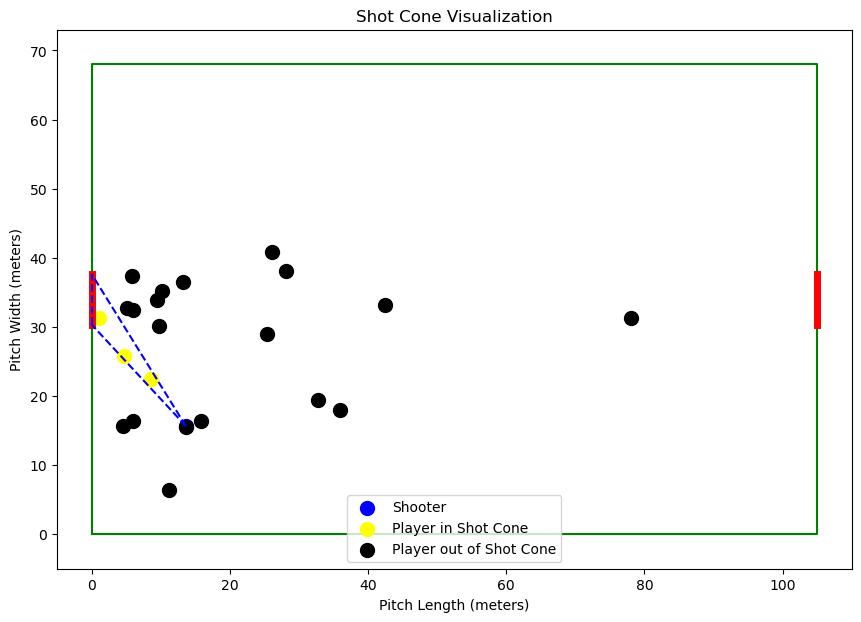

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

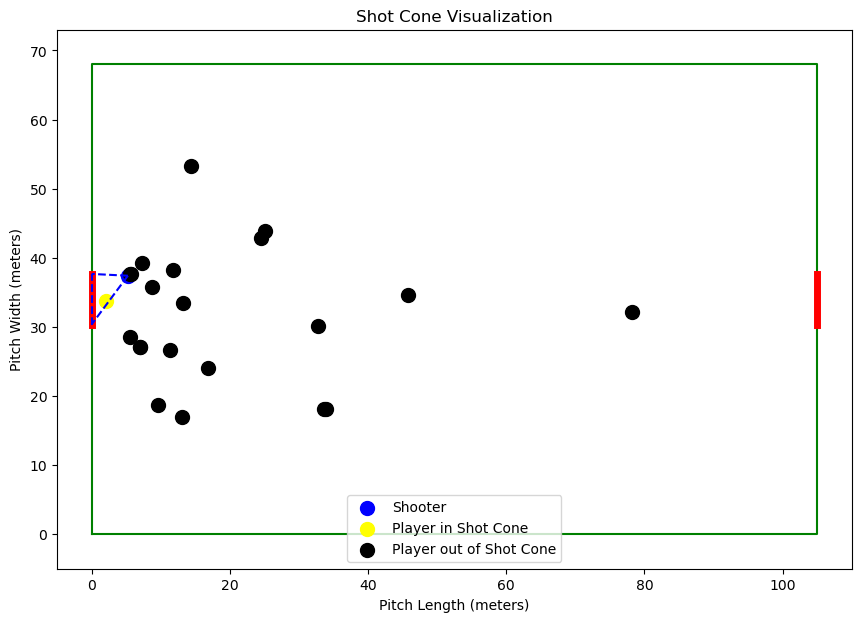

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

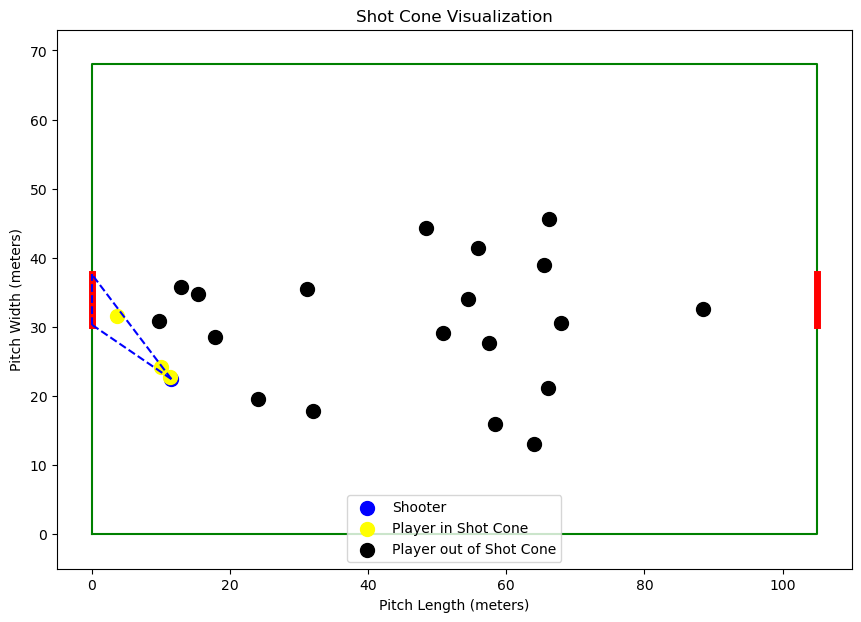

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

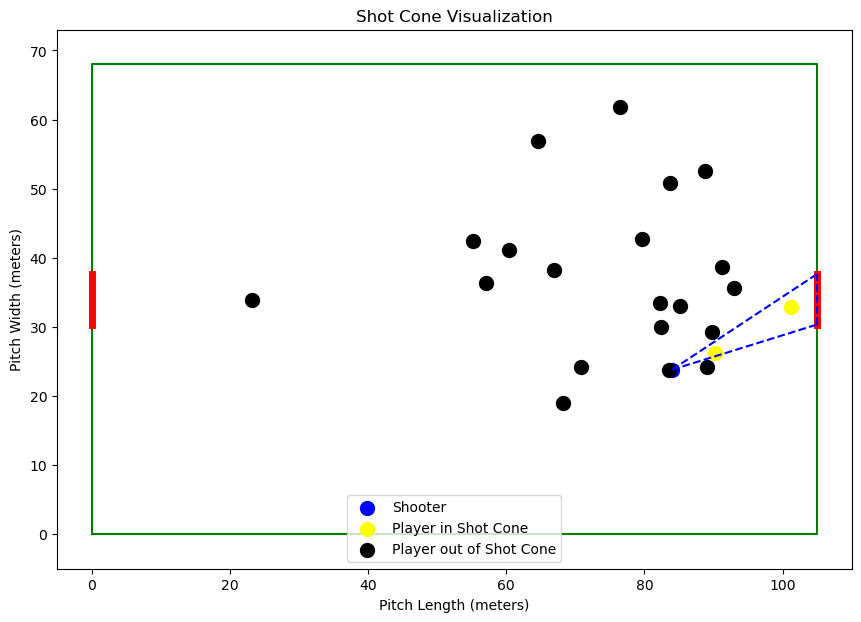

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

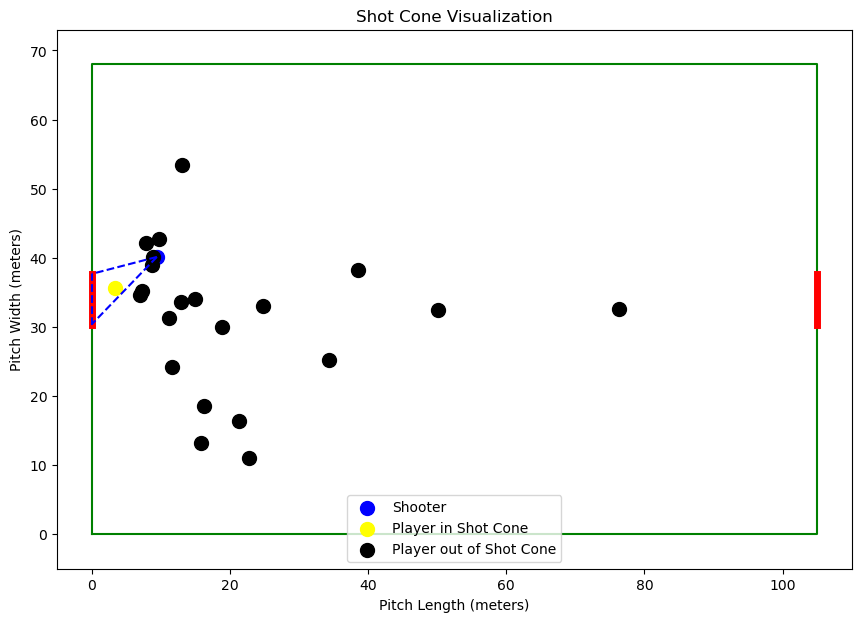

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

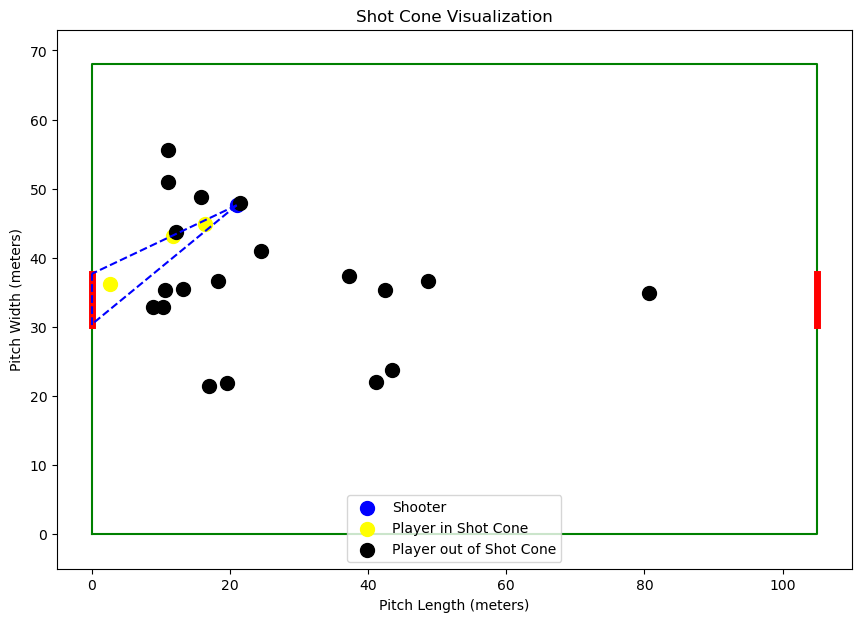

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

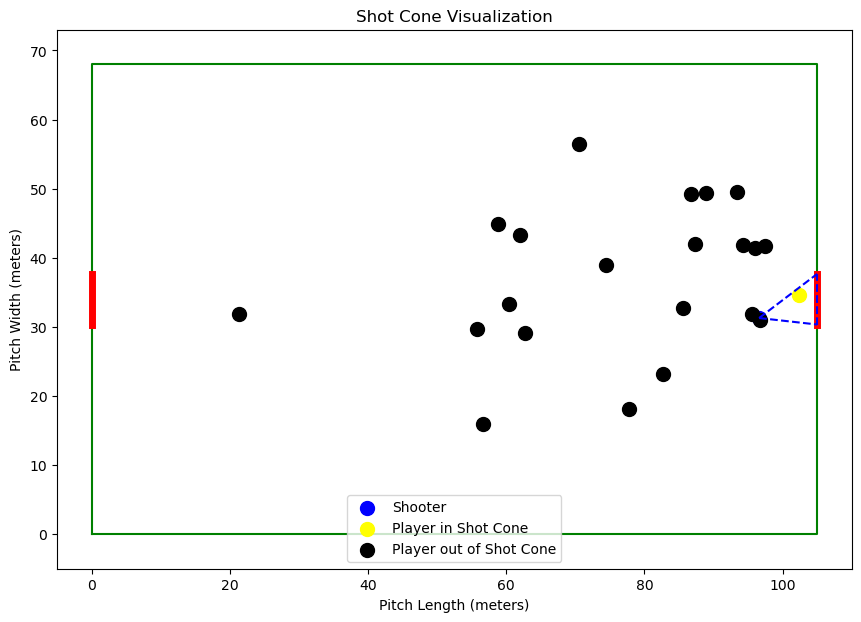

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

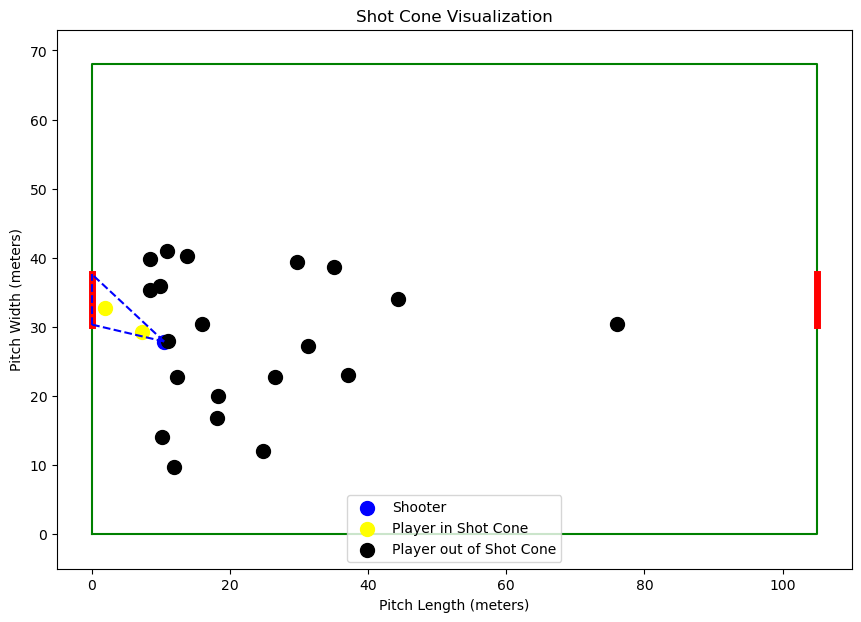

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

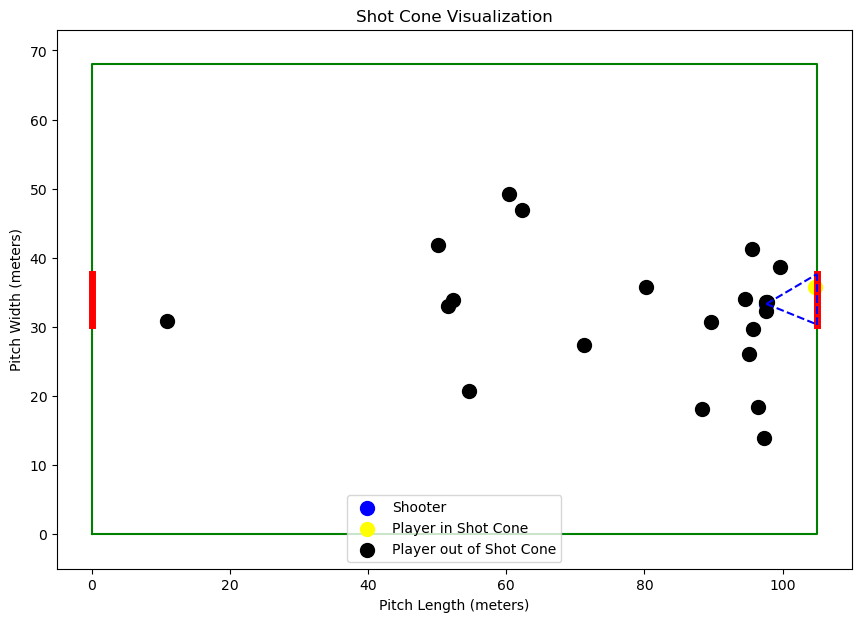

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

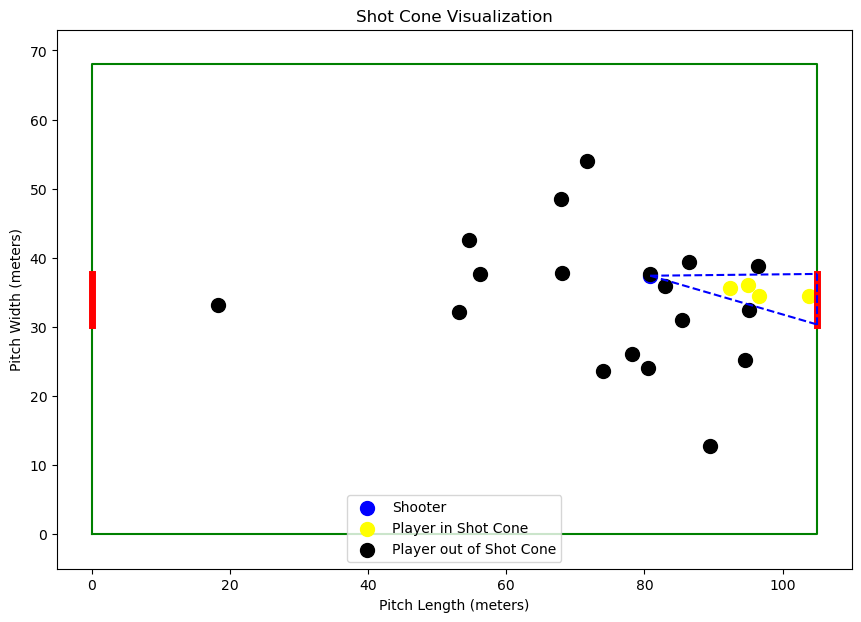

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

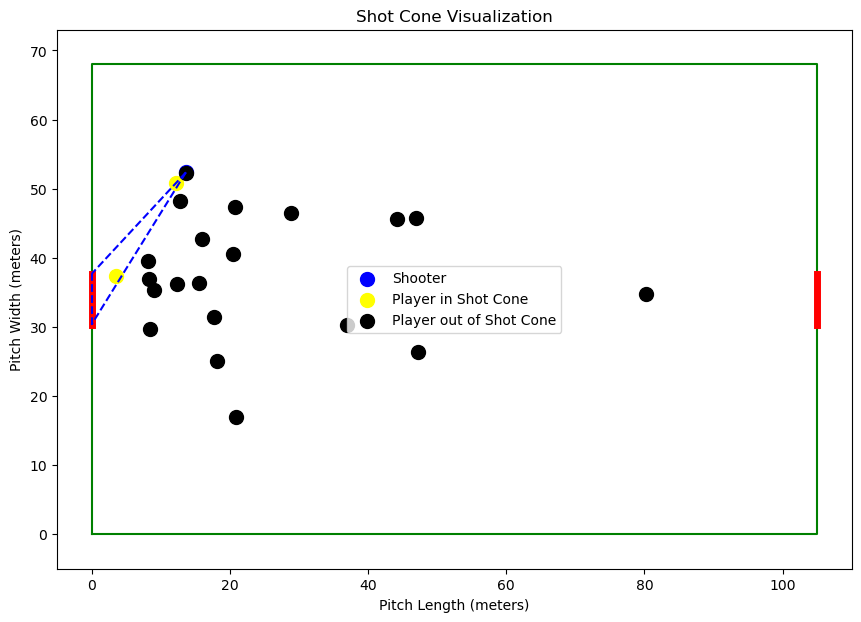

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

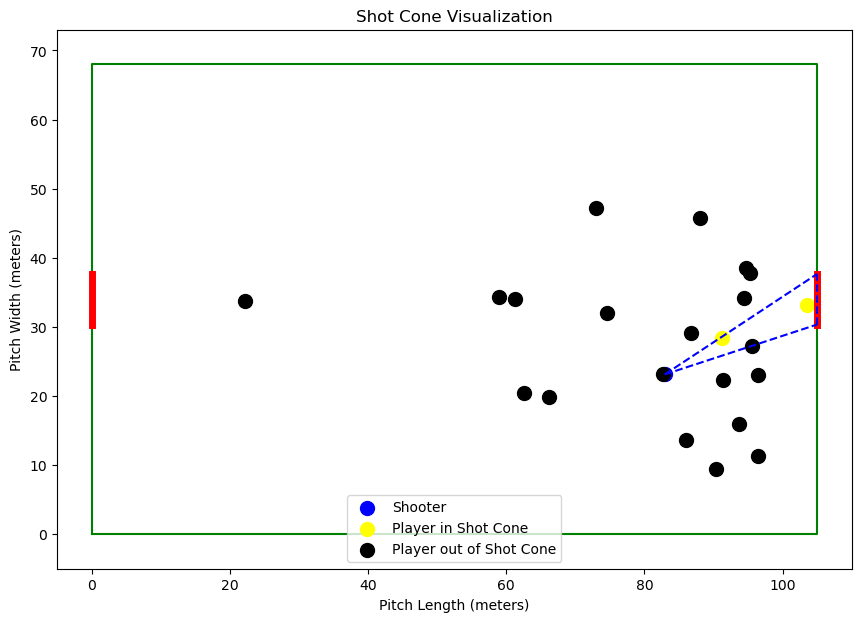

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

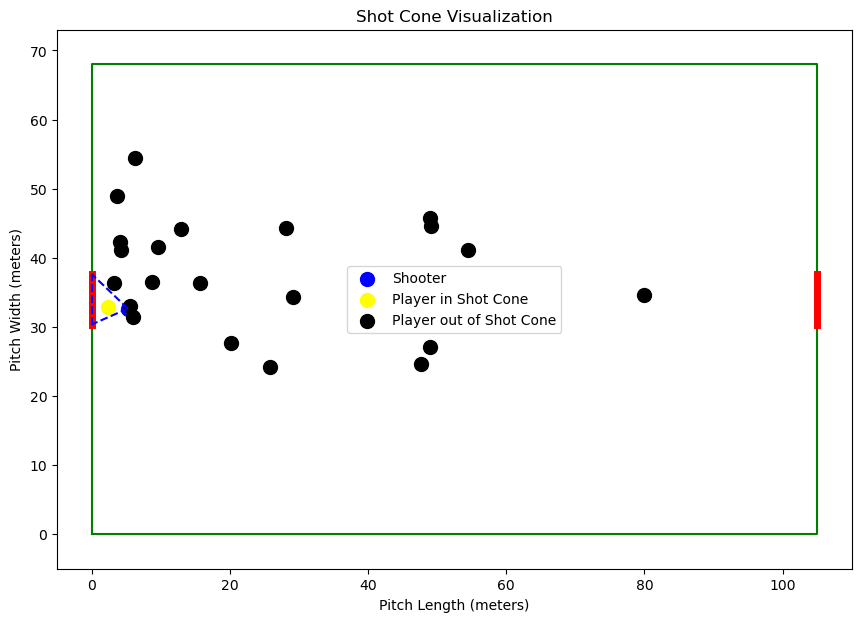

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

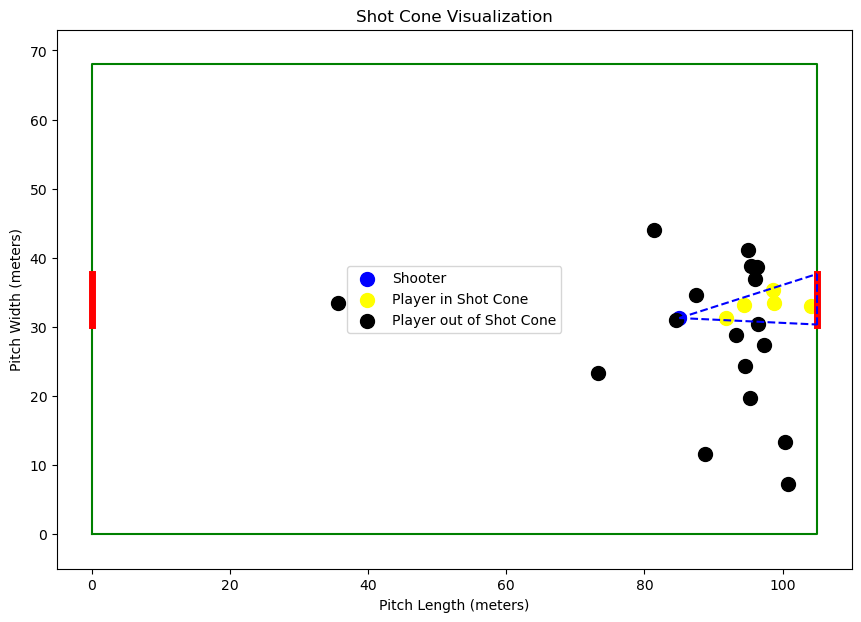

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

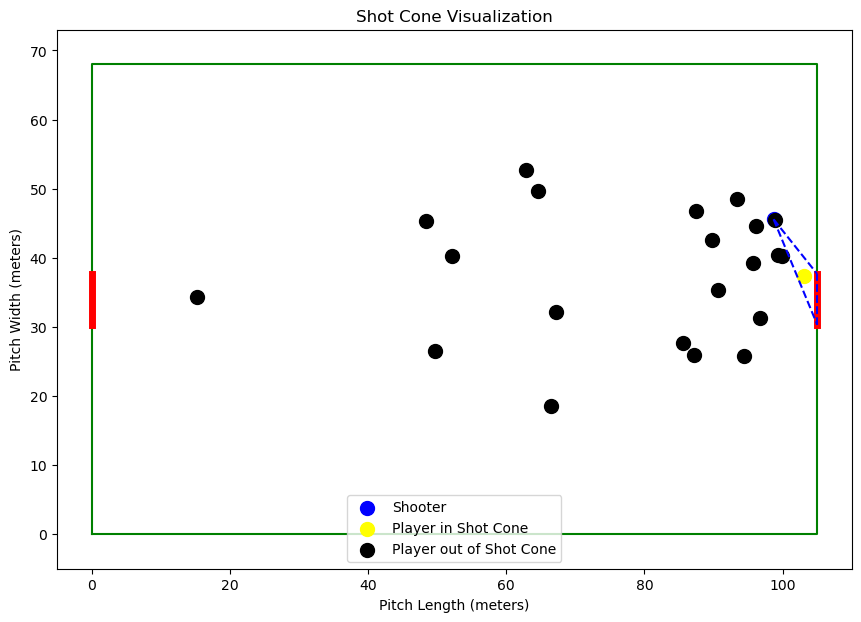

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

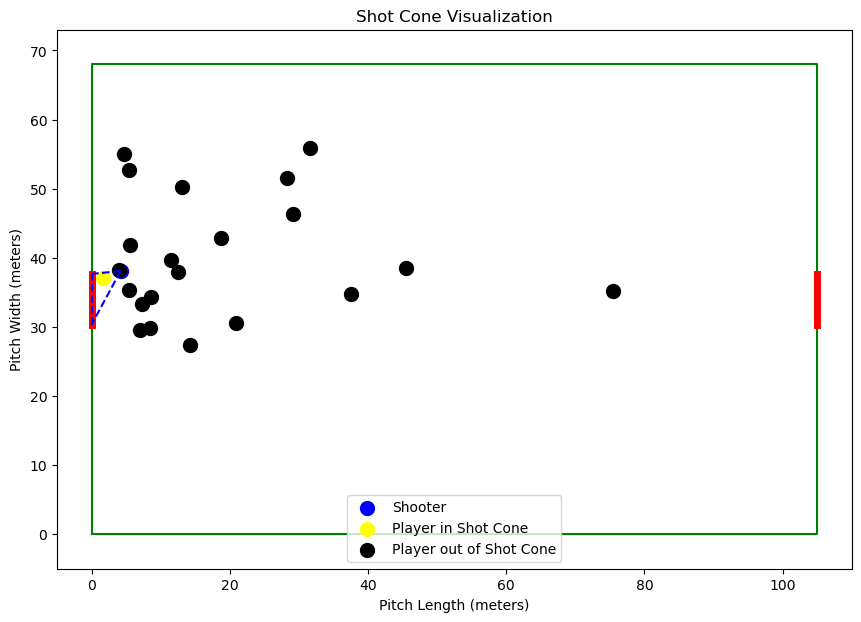

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

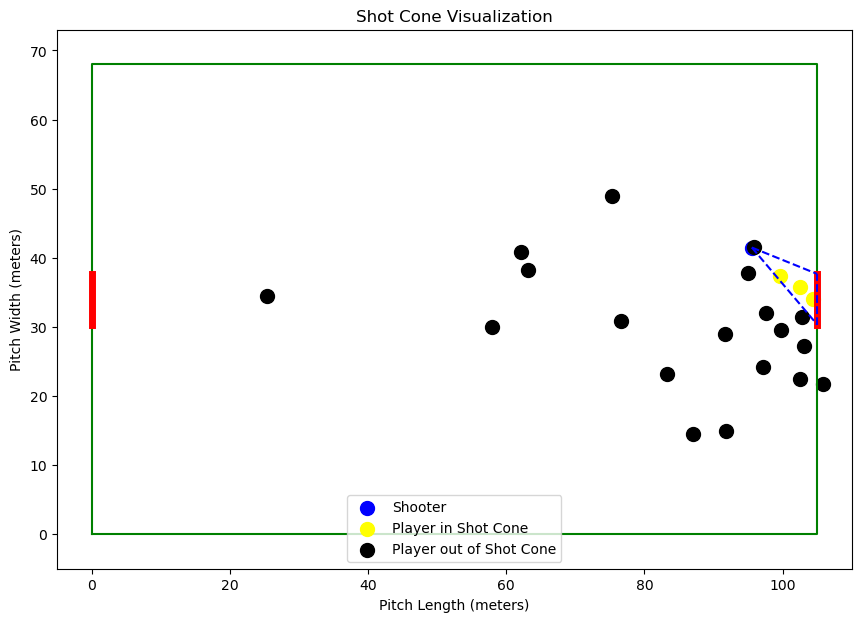

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

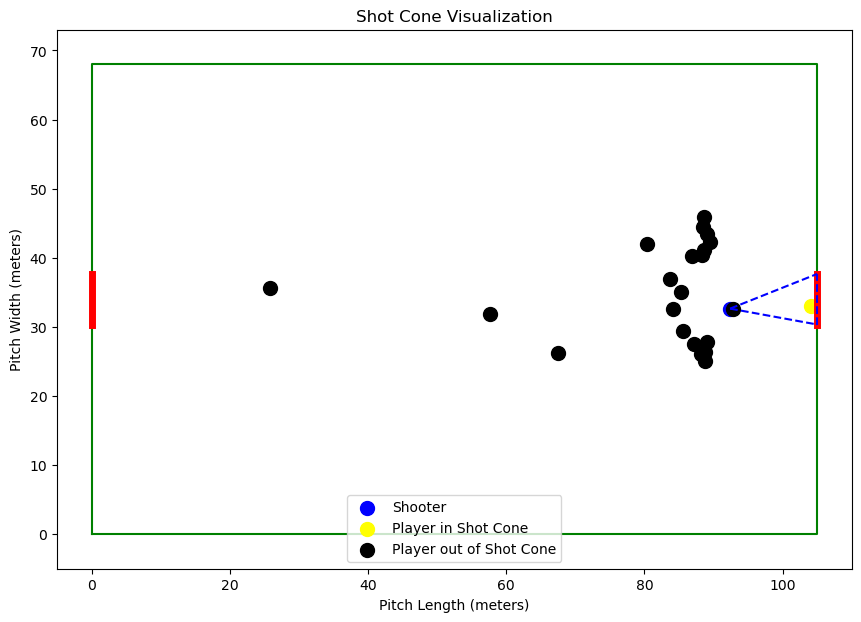

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

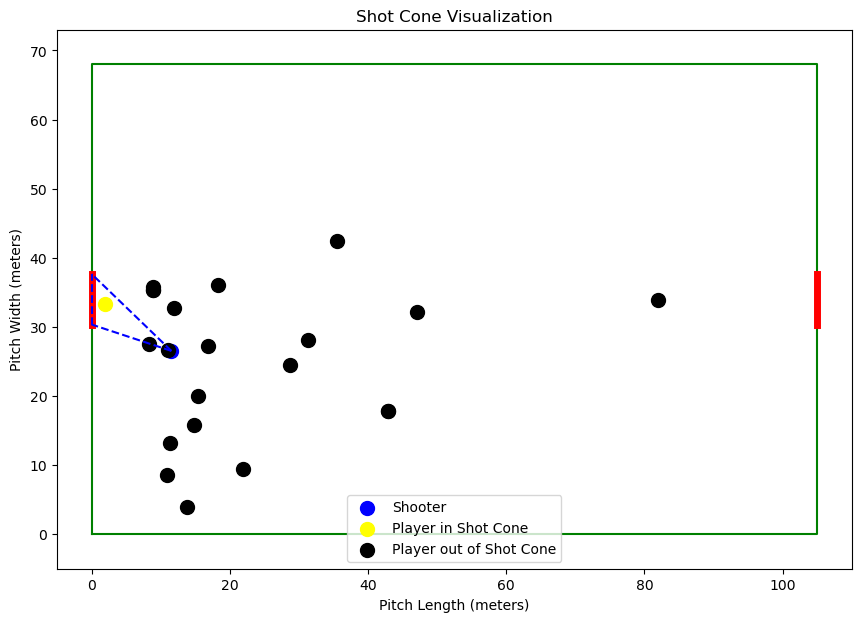

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

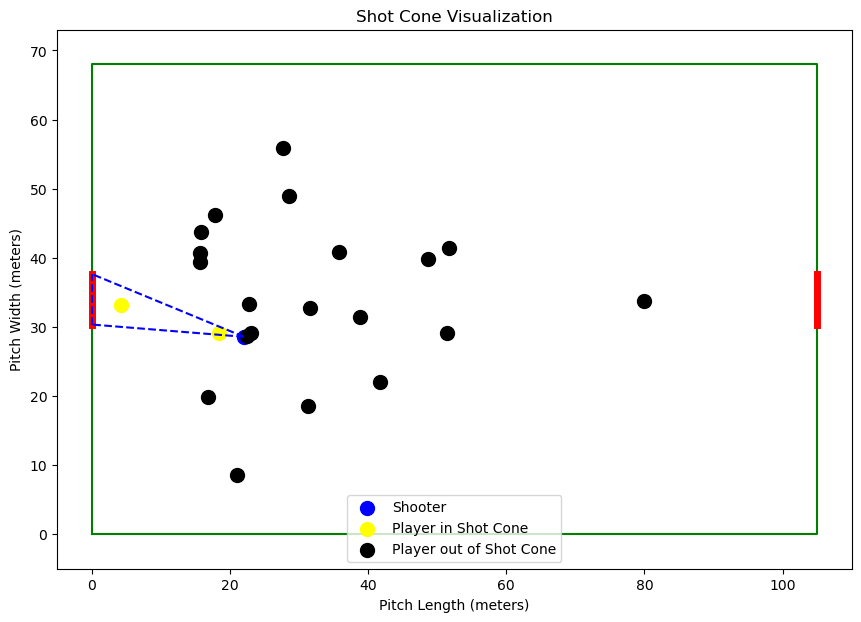

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

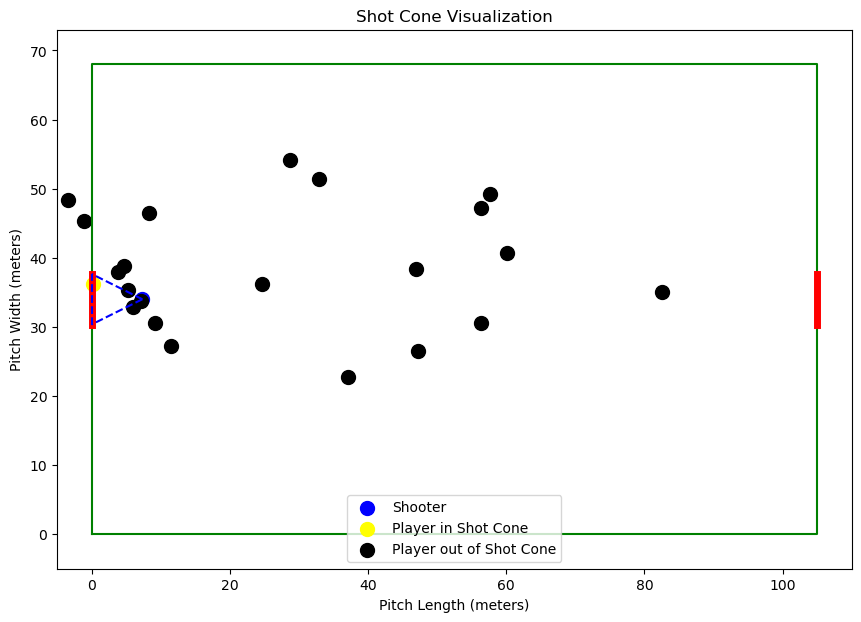

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

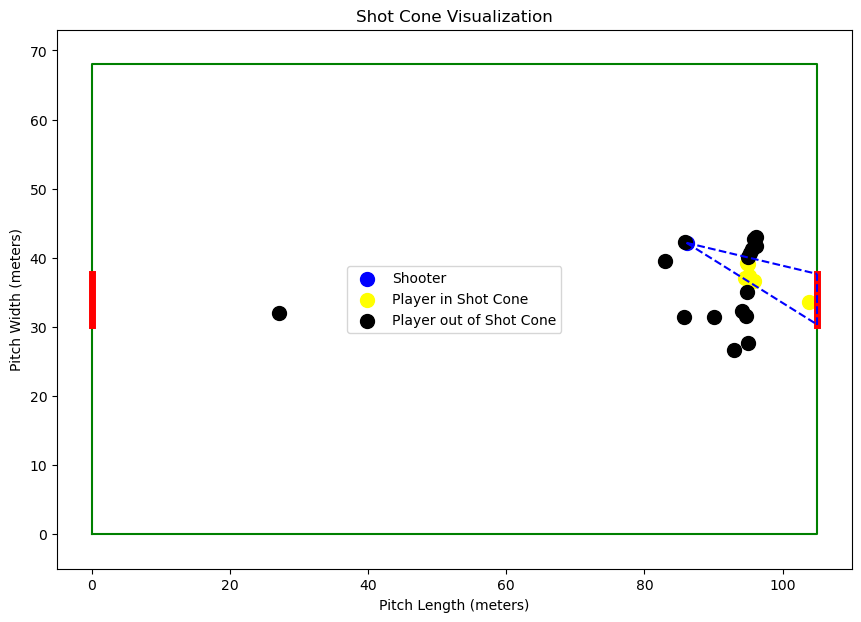

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

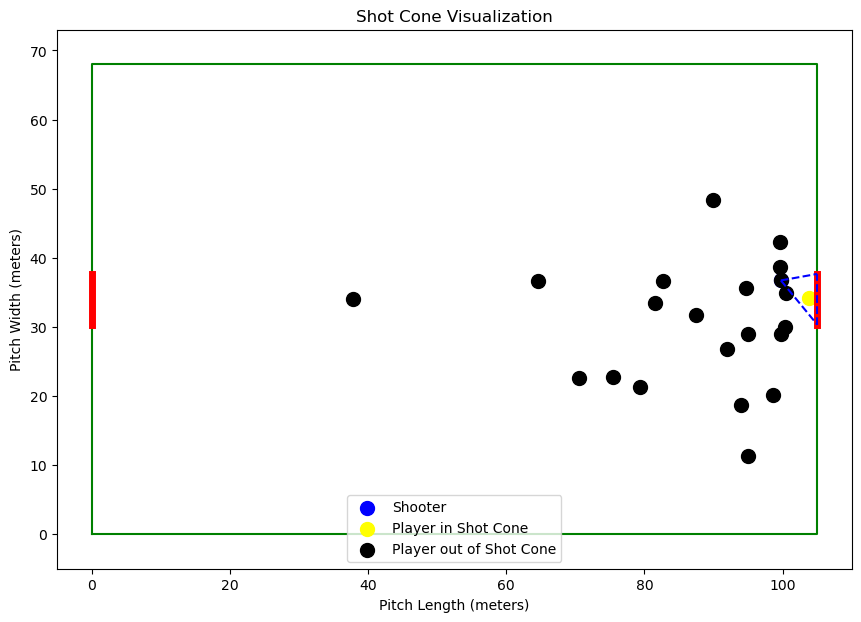

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

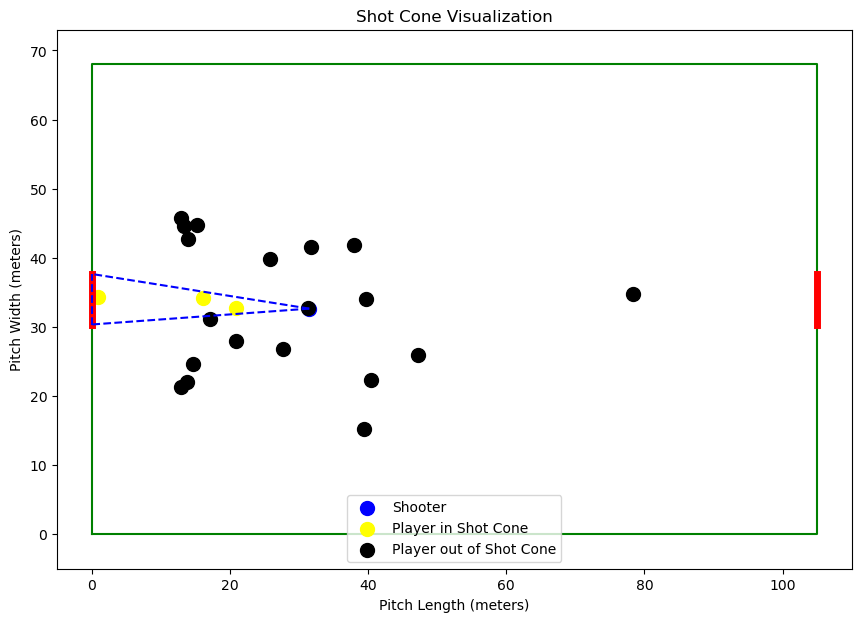

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Teammates"].iloc[i] = home_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Number_Intervening_Opponents"].iloc[i] = away_true_count
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Number_Intervening_Teammates,Number_Intervening_Opponents,Interference_on_Shooter
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,13.65,15.64,-2.10,31.28,0,3,Low
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,5.25,37.40,-1.05,36.04,0,1,Medium
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,11.55,22.44,4.20,33.32,1,2,Low
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,84.00,23.80,90.30,22.44,1,1,Low
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,9.45,40.12,-1.05,40.12,0,1,Medium
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,21.00,47.60,0.00,36.72,0,3,Low
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,96.60,31.28,106.05,32.64,0,1,Medium
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,10.50,27.88,-2.10,51.68,0,2,Low
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,97.65,33.32,106.05,40.80,0,1,High
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,80.85,37.40,103.95,36.04,1,3,Low


In [18]:
fs.detect_players(home, away, shots)

# Final Cleaning - Preperation for the ML alogorithm 

This function tranforms the XY coordinates into a new column specifically which is in the same coordinate reference system as the model was trained on. Ie where the goal is centered at y= 0.

In [19]:
fs.ML_X_Y(shots)

C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:350: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ML X'] = df['Start X']
C:\Users\23510\Football stats\City Football Group Application\Expected Goals\Functions.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ML Y'] = df['Start Y']


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Number_Intervening_Teammates,Number_Intervening_Opponents,Interference_on_Shooter,ML X,ML Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,13.65,15.64,-2.10,31.28,0,3,Low,13.65,18.36
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,5.25,37.40,-1.05,36.04,0,1,Medium,5.25,-3.40
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,11.55,22.44,4.20,33.32,1,2,Low,11.55,11.56
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,84.00,23.80,90.30,22.44,1,1,Low,21.00,10.20
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,9.45,40.12,-1.05,40.12,0,1,Medium,9.45,-6.12
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,21.00,47.60,0.00,36.72,0,3,Low,21.00,-13.60
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,96.60,31.28,106.05,32.64,0,1,Medium,8.40,2.72
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,10.50,27.88,-2.10,51.68,0,2,Low,10.50,6.12
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,97.65,33.32,106.05,40.80,0,1,High,7.35,0.68
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,80.85,37.40,103.95,36.04,1,3,Low,24.15,-3.40


Creates and angle column to show how big the goal is in the players view.

In [20]:
# Calculate the angle using np.arctan
shots["Angle"] = fs.angle_cal(shots['ML X'] , shots['ML Y'])
# Convert the angle from radians to degrees
shots['Angle_degrees'] = np.degrees(shots['Angle'])
shots['Absolute_Angle_degrees'] =  np.abs(shots['Angle_degrees'])

C:\Users\23510\AppData\Local\Temp\ipykernel_10836\1696044824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["Angle"] = fs.angle_cal(shots['ML X'] , shots['ML Y'])
C:\Users\23510\AppData\Local\Temp\ipykernel_10836\1696044824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['Angle_degrees'] = np.degrees(shots['Angle'])
C:\Users\23510\AppData\Local\Temp\ipykernel_10836\1696044824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [21]:
shots["distance"] = np.sqrt(shots["ML X"]**2 + shots["ML Y"]**2) 

C:\Users\23510\AppData\Local\Temp\ipykernel_10836\1380337500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["distance"] = np.sqrt(shots["ML X"]**2 + shots["ML Y"]**2)


this function formats the shots into headed and non headed attempts.

In [22]:
shots = shots.apply(fs.format_shot_type, axis=1)

This function takes strings and encodes them into numeric values for the ML algorithm for the inference on shooter.

In [23]:
# Define the order of categories
categories = [['Low', 'Medium', 'High']]

# Initialise ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the categorical data
shots['Interference_on_Shooter_encoded'] = ordinal_encoder.fit_transform(shots[['Interference_on_Shooter']])

# XG predictions

In [24]:
import joblib

Load in the model that was trained in the other notebook.

In [25]:
model = joblib.load('model_general.pkl')

C:\Users\23510\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [83]:
model_foot = joblib.load('model_foot.pkl')

In [104]:
model_head = joblib.load('model_head.pkl')

In [105]:
model_fk = joblib.load('model_fk.pkl')

In [184]:
def predict(shots, model_general):
    # Iterate through each shot in the dataframe
    for index, shot in shots.iterrows():
        # Extract the features and ensure they are converted to a float type
        features = [shot[[
            'Number_Intervening_Opponents', 'Number_Intervening_Teammates',
            'Absolute_Angle_degrees', 'distance', 'Interference_on_Shooter_encoded','BodyPart_Foot', 'BodyPart_Head', 'BodyPart_Other'
        ]].astype(float).values]
        
        if shot.iloc[0] == 0:
            shots.at[index, "XG"] = 1.2* model_foot.predict_proba(features)[:, 1][0]
        if shot.iloc[0] == 2:
            shots.at[index, "XG"] = 0.8* model_foot.predict_proba(features)[:, 1][0]
        if shot.iloc[0] == 3:
            shots.at[index, "XG"] = 1.1 *model_foot.predict_proba(features)[:, 1][0]
        
    return shots



In [185]:
shots = predict(shots, model)

In [186]:
shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,...,Angle_degrees,Absolute_Angle_degrees,distance,BodyPart_Foot,BodyPart_Head,BodyPart_Other,Interference_on_Shooter_encoded,XG,Time [min],Goal
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,...,11.087614,11.087614,22.878201,True,False,False,0.0,0.046449,2.946000,0
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,...,56.351136,56.351136,6.254798,True,False,False,1.0,0.419963,8.134667,1
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,...,18.444733,18.444733,16.341239,True,False,False,0.0,0.129748,10.989333,0
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,...,16.130953,16.130953,23.346092,True,False,False,0.0,0.102706,12.343333,0
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,...,31.424908,31.424908,11.258637,False,True,False,1.0,0.121012,18.230000,0
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,...,14.090436,14.090436,25.019193,True,False,False,0.0,0.040886,19.836000,0
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,...,43.667780,43.667780,8.829405,True,False,False,1.0,0.312192,35.366000,1
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,...,29.807942,29.807942,12.153370,False,True,False,0.0,0.117225,37.386000,0
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,...,52.729420,52.729420,7.381389,False,True,False,2.0,0.100698,42.241333,0
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,...,16.916581,16.916581,24.388163,True,False,False,0.0,0.045387,43.181333,0


In [111]:
shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,...,Angle_degrees,Absolute_Angle_degrees,distance,BodyPart_Foot,BodyPart_Head,BodyPart_Other,Interference_on_Shooter_encoded,XG,Time [min],Goal
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,...,11.087614,11.087614,22.878201,True,False,False,0.0,0.046449,2.946000,0
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,...,56.351136,56.351136,6.254798,True,False,False,1.0,0.419963,8.134667,1
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,...,18.444733,18.444733,16.341239,True,False,False,0.0,0.129748,10.989333,0
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,...,16.130953,16.130953,23.346092,True,False,False,0.0,0.102706,12.343333,0
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,...,31.424908,31.424908,11.258637,False,True,False,1.0,0.121012,18.230000,0
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,...,14.090436,14.090436,25.019193,True,False,False,0.0,0.040886,19.836000,0
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,...,43.667780,43.667780,8.829405,True,False,False,1.0,0.312192,35.366000,1
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,...,29.807942,29.807942,12.153370,False,True,False,0.0,0.117225,37.386000,0
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,...,52.729420,52.729420,7.381389,False,True,False,2.0,0.100698,42.241333,0
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,...,16.916581,16.916581,24.388163,True,False,False,0.0,0.045387,43.181333,0


Select the relevant predictive features.

In [132]:
shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,...,Angle_degrees,Absolute_Angle_degrees,distance,BodyPart_Foot,BodyPart_Head,BodyPart_Other,Interference_on_Shooter_encoded,XG,Time [min],Goal
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,...,11.087614,11.087614,22.878201,True,False,False,0.0,0.046449,2.946000,0
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,...,56.351136,56.351136,6.254798,True,False,False,1.0,0.419963,8.134667,1
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,...,18.444733,18.444733,16.341239,True,False,False,0.0,0.129748,10.989333,0
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,...,16.130953,16.130953,23.346092,True,False,False,0.0,0.102706,12.343333,0
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,...,31.424908,31.424908,11.258637,False,True,False,1.0,0.121012,18.230000,0
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,...,14.090436,14.090436,25.019193,True,False,False,0.0,0.040886,19.836000,0
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,...,43.667780,43.667780,8.829405,True,False,False,1.0,0.312192,35.366000,1
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,...,29.807942,29.807942,12.153370,False,True,False,0.0,0.117225,37.386000,0
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,...,52.729420,52.729420,7.381389,False,True,False,2.0,0.100698,42.241333,0
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,...,16.916581,16.916581,24.388163,True,False,False,0.0,0.045387,43.181333,0


This is a plot showing how each teams goals scored compared to their predicted XG over the game.

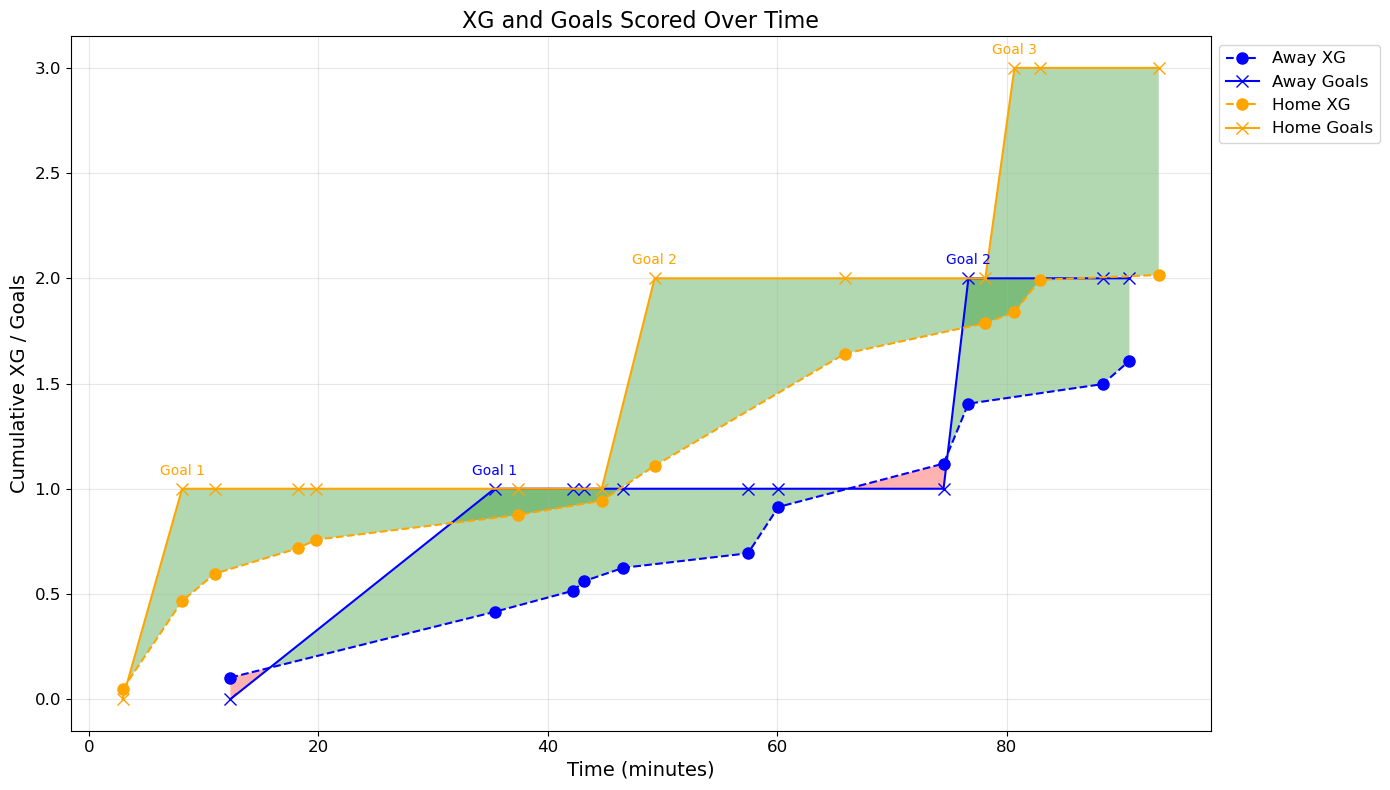

In [112]:
# Call the function with the example DataFrame
fs.plot_xg_and_goals_over_time(shots)

## Binomial Probalities

In [113]:
prob_dfs=fs.plot_stacked_binomial_probabilities(shots,False)

In [114]:
# Access individual probability DataFrames
home_prob_df = prob_dfs.get('Home')
away_prob_df = prob_dfs.get('Away')

In [115]:
home_prob_df

,Goals 0,Goals 1,Goals 2,Goals 3,Goals 4,Goals 5,Goals 6,Goals 7,Goals 8,Goals 9,Goals 10,Goals 11,Goals 12,Goals 13,Time [min]
0,0.953551,0.046449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.946000
1,0.553095,0.427398,0.019507,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.134667
2,0.481332,0.443707,0.072430,0.002531,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.989333
3,0.423085,0.448260,0.117359,0.010990,0.000306,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,18.230000
4,0.405787,0.447231,0.130888,0.015339,0.000743,0.000013,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19.836000
5,0.358218,0.442373,0.167971,0.028884,0.002454,0.000098,0.000001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37.386000
6,0.333940,0.436669,0.186569,0.038311,0.004245,0.000258,0.000008,9.949290e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,44.711333
7,0.278537,0.419625,0.228063,0.062908,0.009897,0.000919,0.000049,1.413811e-06,1.650654e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,49.322000
8,0.129976,0.344374,0.330235,0.150995,0.038171,0.005708,0.000513,2.704369e-05,7.617764e-07,8.803971e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,65.920000
9,0.111140,0.313305,0.332284,0.176970,0.054521,0.010412,0.001266,9.753127e-05,4.570403e-06,1.179205e-07,1.275822e-09,0.000000e+00,0.000000e+00,0.000000e+00,78.145333


In [116]:
away_prob_df

,Goals 0,Goals 1,Goals 2,Goals 3,Goals 4,Goals 5,Goals 6,Goals 7,Goals 8,Goals 9,Goals 10,Goals 11,Time [min]
0,0.897294,0.102706,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,12.343333
1,0.617166,0.350770,0.032064,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,35.366000
2,0.555018,0.377596,0.064157,0.003229,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,42.241333
3,0.529828,0.385648,0.078383,0.005994,0.000147,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,43.181333
4,0.496282,0.394777,0.097837,0.010577,0.000517,0.000009,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,46.591333
5,0.462052,0.401778,0.118318,0.016596,0.001211,0.000044,6.399598e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,57.460667
6,0.360362,0.415043,0.180703,0.038983,0.004597,0.000301,1.024494e-05,1.408444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,60.110000
7,0.286086,0.403773,0.229004,0.068194,0.011684,0.001186,7.017184e-05,2.223450e-06,2.903013e-08,0.000000e+00,0.000000e+00,0.000000e+00,74.505333
8,0.204600,0.370252,0.278784,0.113998,0.027780,0.004177,3.881111e-04,2.157729e-05,6.540698e-07,8.268693e-09,0.000000e+00,0.000000e+00,76.672667
9,0.185547,0.354826,0.287301,0.129343,0.035809,0.006375,7.408995e-04,5.570980e-05,2.602490e-06,6.840725e-08,7.700007e-10,0.000000e+00,88.380000


In [117]:
total_prob_df = fs.combine_prob_dataframes(home_prob_df,away_prob_df)

In [118]:
rolling_probs = fs.calculate_rolling_win_chance(total_prob_df)

In [119]:
rolling_probs

,Time [min],Home Win Probability,Away Win Probability,Draw Probability
0,0.000000,0.000000,0.000000,1.000000
1,2.946000,0.046449,0.000000,0.953551
2,8.134667,0.446905,0.000000,0.553095
3,10.989333,0.518668,0.000000,0.481332
4,12.343333,0.473097,0.049436,0.477468
5,18.230000,0.530876,0.043453,0.425671
6,19.836000,0.548280,0.041677,0.410043
7,35.366000,0.418801,0.169689,0.411510
8,37.386000,0.467040,0.151323,0.381637
9,42.241333,0.433522,0.189753,0.376726


#### Rolling binomial win probabilites

Given the quality of shots, which team should be infront at any point in the game.

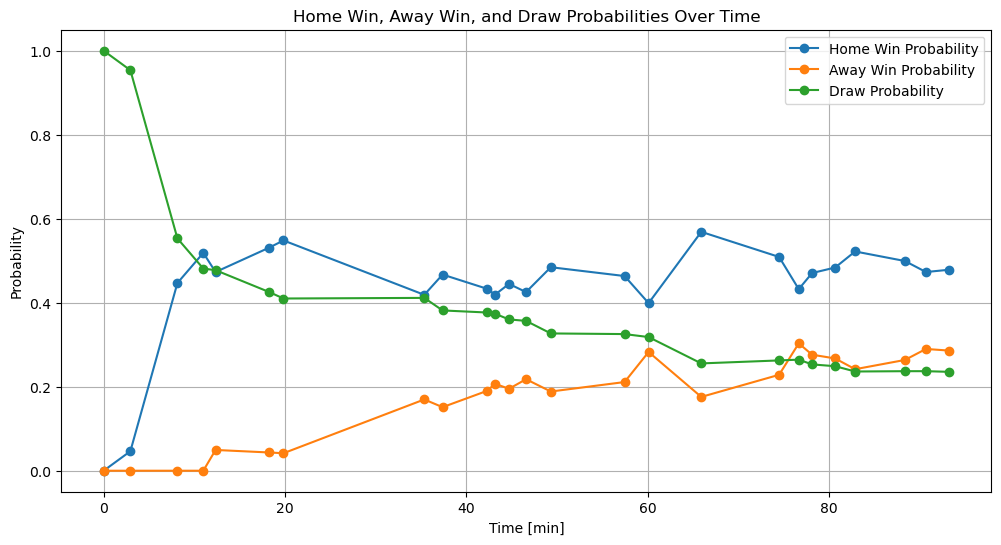

In [120]:
fs.plot_win_probabilities(rolling_probs)

# Strategy function 

In [121]:
shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,...,Angle_degrees,Absolute_Angle_degrees,distance,BodyPart_Foot,BodyPart_Head,BodyPart_Other,Interference_on_Shooter_encoded,XG,Time [min],Goal
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,...,11.087614,11.087614,22.878201,True,False,False,0.0,0.046449,2.946000,0
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,...,56.351136,56.351136,6.254798,True,False,False,1.0,0.419963,8.134667,1
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,...,18.444733,18.444733,16.341239,True,False,False,0.0,0.129748,10.989333,0
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,...,16.130953,16.130953,23.346092,True,False,False,0.0,0.102706,12.343333,0
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,...,31.424908,31.424908,11.258637,False,True,False,1.0,0.121012,18.230000,0
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,...,14.090436,14.090436,25.019193,True,False,False,0.0,0.040886,19.836000,0
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,...,43.667780,43.667780,8.829405,True,False,False,1.0,0.312192,35.366000,1
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,...,29.807942,29.807942,12.153370,False,True,False,0.0,0.117225,37.386000,0
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,...,52.729420,52.729420,7.381389,False,True,False,2.0,0.100698,42.241333,0
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,...,16.916581,16.916581,24.388163,True,False,False,0.0,0.045387,43.181333,0


In [122]:
fs.predict_win_chance_with_stratagey(45,"Home","attacking",shots)


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 582
    Draws: 214
    Away Wins: 204
    Average Home Goals after 45 minute: 2.101
    Average Away Goals after 45 minute: 1.193
    Average Points for Home Team: 1.96
    Average Points for Away Team: 0.83
    


(1, 1, 1.96, 0.826)

In [123]:
fs.predict_win_chance_with_stratagey(45,"Home","neutral",shots)


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 458
    Draws: 356
    Away Wins: 186
    Average Home Goals after 45 minute: 1.05
    Average Away Goals after 45 minute: 0.568
    Average Points for Home Team: 1.73
    Average Points for Away Team: 0.91
    


(1, 1, 1.73, 0.914)

In [124]:
fs.predict_win_chance_with_stratagey(45,"Home","defensive",shots)


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 354
    Draws: 498
    Away Wins: 148
    Average Home Goals after 45 minute: 0.556
    Average Away Goals after 45 minute: 0.283
    Average Points for Home Team: 1.56
    Average Points for Away Team: 0.94
    


(1, 1, 1.56, 0.942)

In [125]:
fs.predict_win_chance_with_stratagey(45,"Away","attacking",shots)


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 583
    Draws: 211
    Away Wins: 206
    Average Home Goals after 45 minute: 2.12
    Average Away Goals after 45 minute: 1.277
    Average Points for Home Team: 1.96
    Average Points for Away Team: 0.83
    


(1, 1, 1.96, 0.829)

In [126]:
fs.predict_win_chance_with_stratagey(45,"Away","neutral",shots)


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 501
    Draws: 298
    Away Wins: 201
    Average Home Goals after 45 minute: 1.228
    Average Away Goals after 45 minute: 0.651
    Average Points for Home Team: 1.80
    Average Points for Away Team: 0.90
    


(1, 1, 1.801, 0.901)

In [127]:
fs.predict_win_chance_with_stratagey(45,"Away","defensive",shots)


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 318
    Draws: 519
    Away Wins: 163
    Average Home Goals after 45 minute: 0.508
    Average Away Goals after 45 minute: 0.287
    Average Points for Home Team: 1.47
    Average Points for Away Team: 1.01
    


(1, 1, 1.473, 1.008)

# What is the best strategy for each team at crucial points in the game?  

Teams could either double there xG scored and conceded, or halve it. What would be the best strategy at different points in the game.

In [128]:
teams = ["Home", "Away"]
crucial_points= [45, 50 ,78, 82]
strategies = ["attacking", "neutral", "defensive"]
for crucial_point in crucial_points:
    for team in teams:
        for chosen_strategy in strategies:
            print ((f" minute: {crucial_point},  {team} team, strategy: {chosen_strategy}")) 
            fs.predict_win_chance_with_stratagey(crucial_point,team,chosen_strategy,shots)

        

 minute: 45,  Home team, strategy: attacking

    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 607
    Draws: 185
    Away Wins: 208
    Average Home Goals after 45 minute: 2.218
    Average Away Goals after 45 minute: 1.21
    Average Points for Home Team: 2.01
    Average Points for Away Team: 0.81
    
 minute: 45,  Home team, strategy: neutral

    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 421
    Draws: 352
    Away Wins: 227
    Average Home Goals after 45 minute: 1.013
    Average Away Goals after 45 minute: 0.657
    Average Points for Home Team: 1.61
    Average Points for Away Team: 1.03
    
 minute: 45,  Home team, strategy: defensive

    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 342
    Draws: 491
    Away Wins: 167
    Average Home Goals after 45 minute: 0.561
 


    
    Score: Home 3: Away 2      XG: Home 1.8390072706870455 : Away 1.4043002691777668
    Results:
    Home Wins: 838
    Draws: 147
    Away Wins: 15
    Average Home Goals after 82 minute: 0.275
    Average Away Goals after 82 minute: 0.228
    Average Points for Home Team: 2.66
    Average Points for Away Team: 0.19
    
 minute: 82,  Away team, strategy: defensive

    
    Score: Home 3: Away 2      XG: Home 1.8390072706870455 : Away 1.4043002691777668
    Results:
    Home Wins: 918
    Draws: 79
    Away Wins: 3
    Average Home Goals after 82 minute: 0.141
    Average Away Goals after 82 minute: 0.099
    Average Points for Home Team: 2.83
    Average Points for Away Team: 0.09
    


Lets plots graph of away team strategy 


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 586
    Draws: 212
    Away Wins: 202
    Average Home Goals after 45 minute: 2.148
    Average Away Goals after 45 minute: 1.241
    Average Points for Home Team: 1.97
    Average Points for Away Team: 0.82
    

    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 425
    Draws: 330
    Away Wins: 245
    Average Home Goals after 45 minute: 1.032
    Average Away Goals after 45 minute: 0.707
    Average Points for Home Team: 1.60
    Average Points for Away Team: 1.06
    

    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 295
    Draws: 529
    Away Wins: 176
    Average Home Goals after 45 minute: 0.495
    Average Away Goals after 45 minute: 0.327
    Average Points for Home Team: 1.41
    Average Points for Away Team: 1.06
    

   

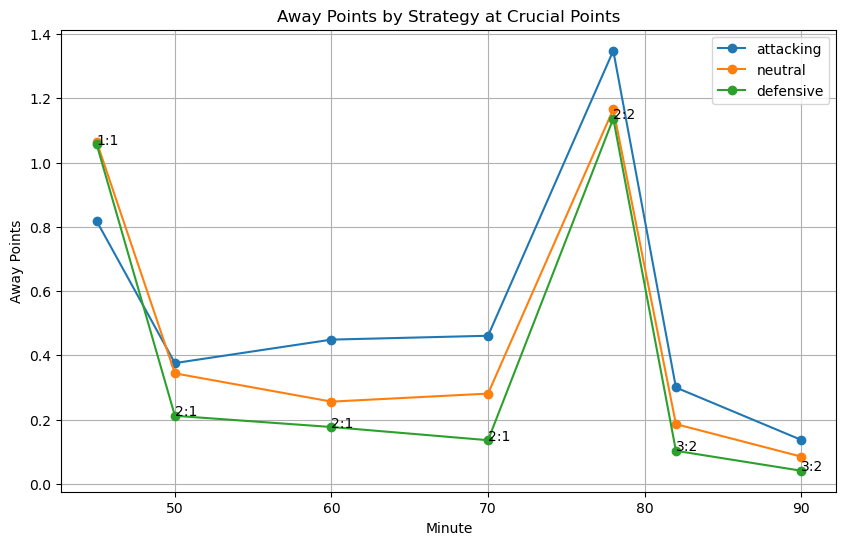

In [129]:
teams = "Away"
crucial_points= [45, 50 ,60,70,78, 82,90]
strategies = ["attacking", "neutral", "defensive"]

# Initialize an empty list to store results
results = []

# Loop through crucial points, teams, and strategies
for crucial_point in crucial_points:
    for chosen_strategy in strategies:
        home_goals, away_goals, home_points,away_points =  fs.predict_win_chance_with_stratagey(crucial_point,team,chosen_strategy,shots)
        results.append({
                "Minute": crucial_point,
                "Team": team,
                "Strategy": chosen_strategy,
                "Away Points": away_points,
                "Score":  str(home_goals)+":"+str(away_goals)
            })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Display the DataFrame
print(df)

# Plot the data
plt.figure(figsize=(10, 6))
for strategy in df["Strategy"].unique():
    subset = df[df["Strategy"] == strategy]
    plt.plot(subset["Minute"], subset["Away Points"], marker='o', label=strategy)


for i in range(len(subset)):
    plt.annotate(subset.iloc[i]["Score"], (subset.iloc[i]["Minute"], subset.iloc[i]["Away Points"]))

plt.xlabel("Minute")
plt.ylabel("Away Points")
plt.title("Away Points by Strategy at Crucial Points")
plt.legend()
plt.grid(True)
plt.show()

In [130]:
import importlib
importlib.reload(fs)


<module 'Functions' from 'C:\\Users\\23510\\Football stats\\City Football Group Application\\Expected Goals\\Functions.py'>


    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 550
    Draws: 204
    Away Wins: 246
    Average Home Goals after 45 minute: 2.009
    Average Away Goals after 45 minute: 1.241
    Average Points for Home Team: 1.85
    Average Points for Away Team: 0.94
    

    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 488
    Draws: 308
    Away Wins: 204
    Average Home Goals after 45 minute: 1.155
    Average Away Goals after 45 minute: 0.636
    Average Points for Home Team: 1.77
    Average Points for Away Team: 0.92
    

    
    Score: Home 1: Away 1      XG: Home 0.9430591926538763 : Away 0.5609832575187814
    Results:
    Home Wins: 346
    Draws: 493
    Away Wins: 161
    Average Home Goals after 45 minute: 0.532
    Average Away Goals after 45 minute: 0.29
    Average Points for Home Team: 1.53
    Average Points for Away Team: 0.98
    

    

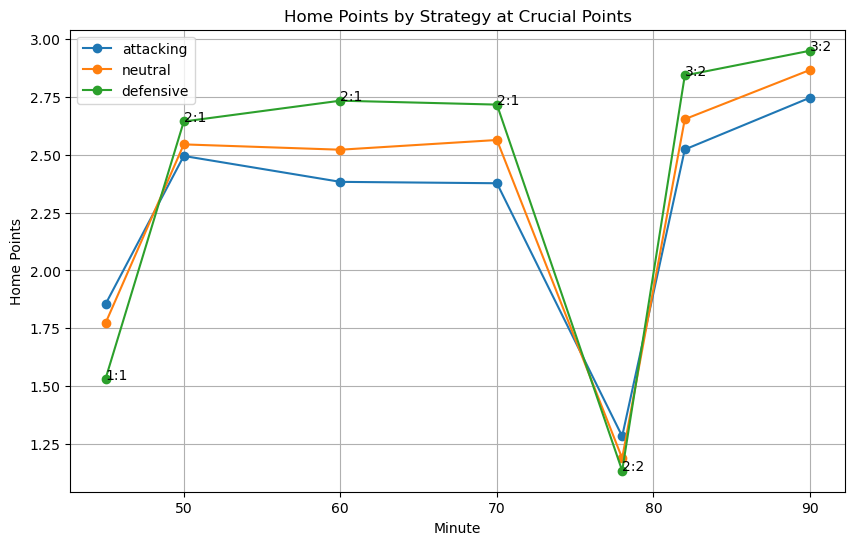

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

teams = "Home"
crucial_points= [45, 50 ,60,70,78, 82,90]
strategies = ["attacking", "neutral", "defensive"]
# Initialize an empty list to store results
results = []

# Loop through crucial points, teams, and strategies
for crucial_point in crucial_points:
    for chosen_strategy in strategies:
        home_goals, away_goals, home_points, away_points = fs.predict_win_chance_with_stratagey(crucial_point, team, chosen_strategy, shots)
        results.append({
            "Minute": crucial_point,
            "Team": team,
            "Strategy": chosen_strategy,
            "Home Points": home_points,  # corrected from away_points
            "Score": str(home_goals) + ":" + str(away_goals)
        })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Display the DataFrame
print(df)

# Plot the data
plt.figure(figsize=(10, 6))
for strategy in df["Strategy"].unique():
    subset = df[df["Strategy"] == strategy]
    plt.plot(subset["Minute"], subset["Home Points"], marker='o', label=strategy)

for i in range(len(subset)):
    plt.annotate(subset.iloc[i]["Score"], (subset.iloc[i]["Minute"], subset.iloc[i]["Home Points"]))

plt.xlabel("Minute")
plt.ylabel("Home Points")
plt.title("Home Points by Strategy at Crucial Points")
plt.legend()
plt.grid(True)
plt.show()
